 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df =  pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# sort dataframe in ascending order and display entries
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# sort dataframe in ascending order and display entries
algo_returns_df.sort_index(ascending=True, inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# sort dataframe in ascending order and display entries
sp500_history_df.sort_index(ascending=True, inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df["Close"]= sp500_history_df["Close"].str.replace('$','').astype("float")
sp500_history_df.sort_index(inplace = True)
sp500_history_df

C:\Users\jpark\AppData\Local\Temp\ipykernel_26968\3458660892.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df["Close"]= sp500_history_df["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={"Close":"sp500"}, inplace=True)
sp500_daily_returns

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

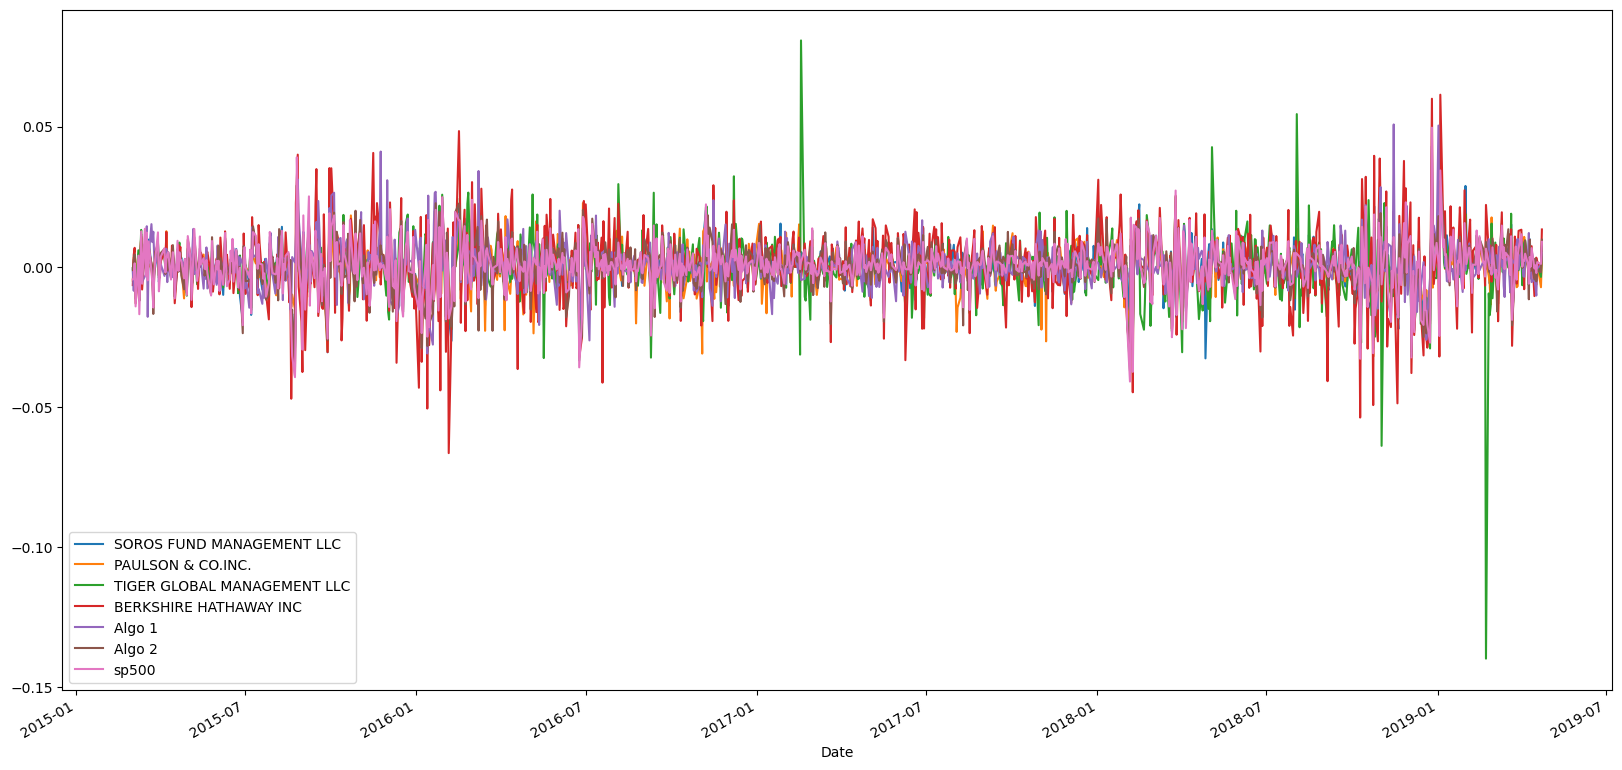

In [15]:
# Plot daily returns of all portfolios
daily_returns_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

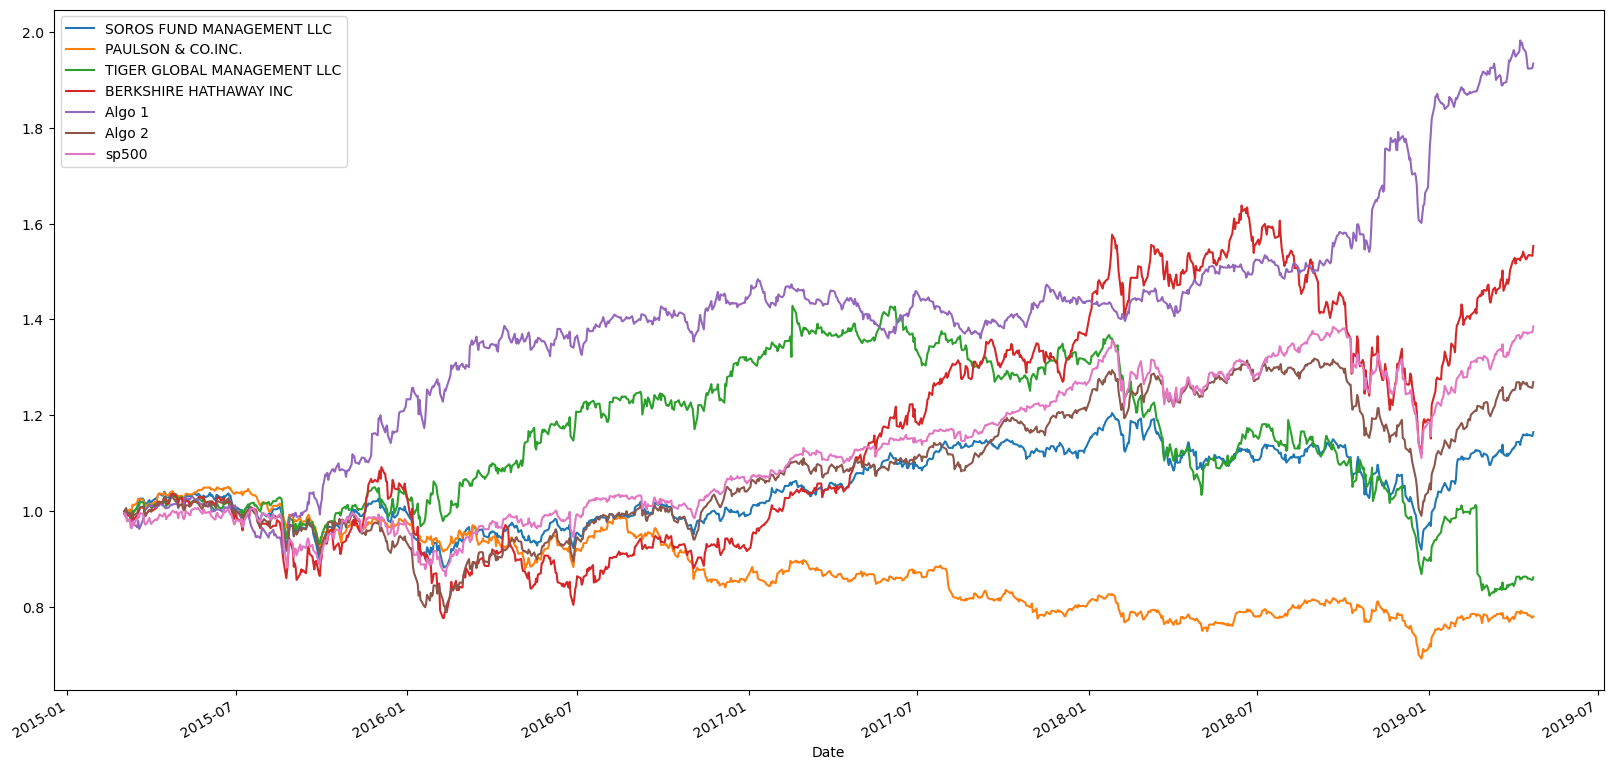

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

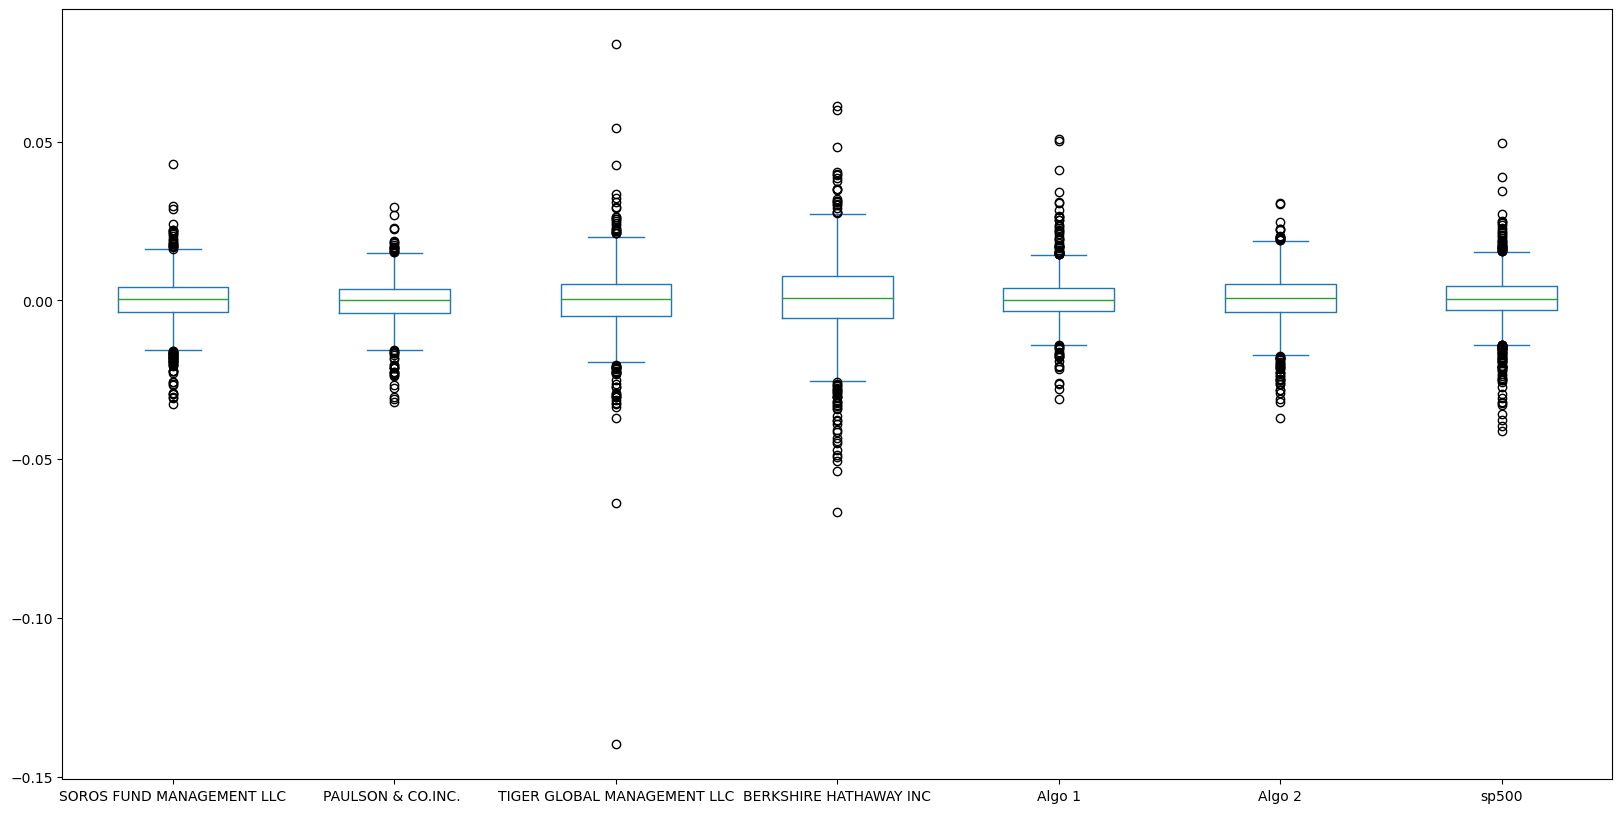

In [17]:
# Box plot to visually show risk
daily_returns_df.plot(kind="box", figsize = (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = pd.DataFrame(daily_returns_df.std()).rename(columns = {0:"std"})
daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
higher_risk = daily_std[daily_std["std"] > daily_std.loc["sp500", "std"]]
higher_risk

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

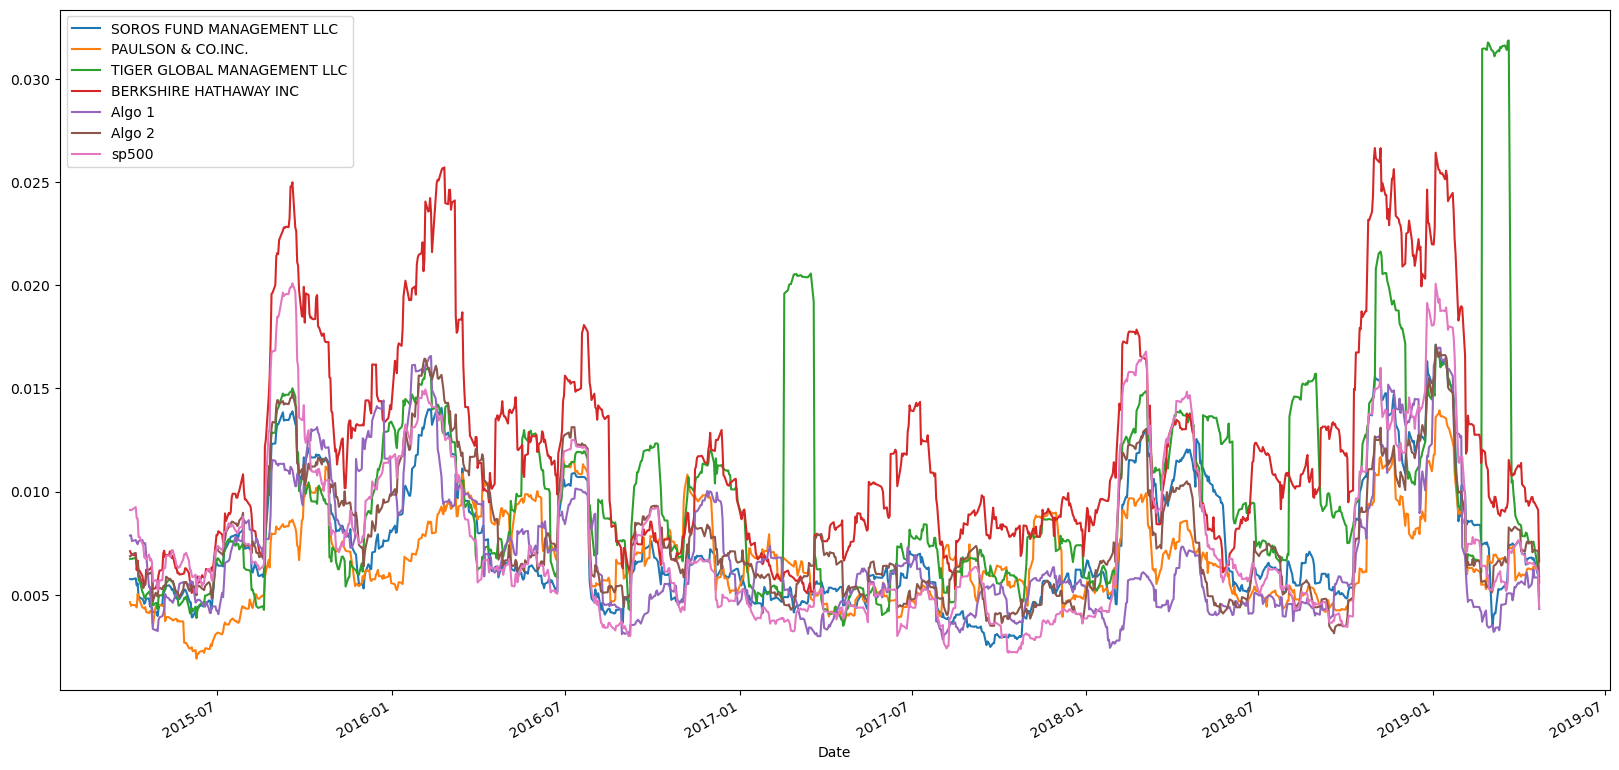

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns_df.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = daily_returns_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

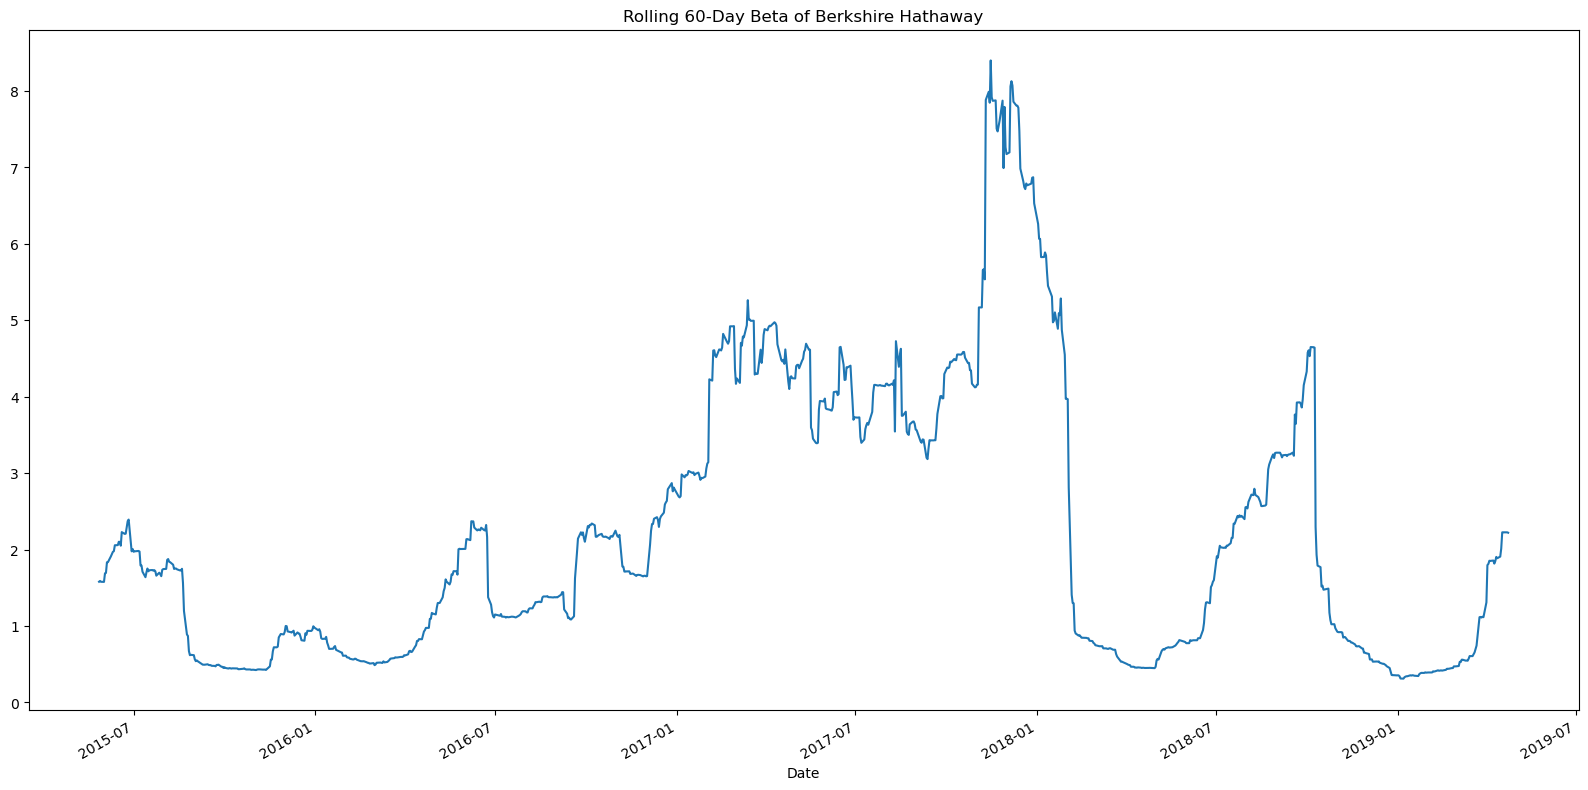

In [23]:
# Calculate covariance of a single portfolio
covariance = daily_returns_df['BERKSHIRE HATHAWAY INC'].cov(daily_returns_df['sp500'])
covariance
# Calculate variance of S&P 500
variance = daily_returns_df['sp500'].rolling(window=60).var()
variance
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Berkshire Hathaway')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
daily_std.ewm(halflife=21).mean()


,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007452
TIGER GLOBAL MANAGEMENT LLC,0.008637
BERKSHIRE HATHAWAY INC,0.009761
Algo 1,0.009304
Algo 2,0.009130
sp500,0.009040


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = daily_returns_df.mean()*252/(daily_returns_df.std()*np.sqrt(252))
annualized_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

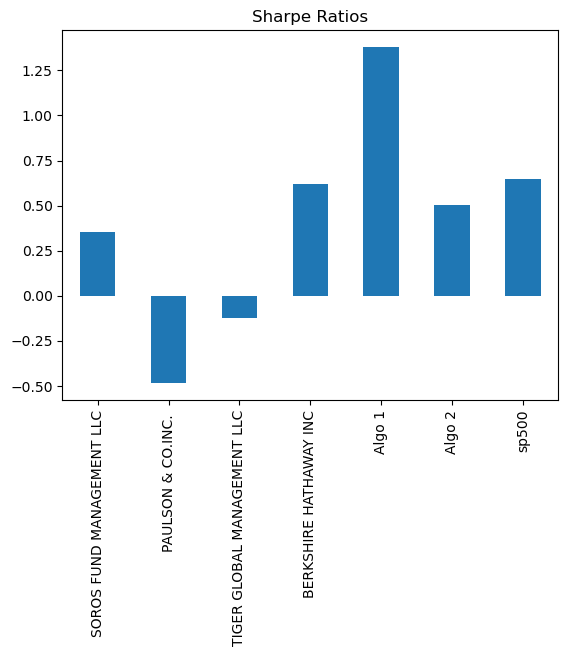

In [26]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

algo 1 outperformed the S&P500 and whales.
algo 2 outperformed the whales but underperformed compared to the S&P500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
tsla_history = pd.read_csv(Path("../Stock Portfolio/tsla_prices.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_history.rename(columns = {"Close":"TSLA"}, inplace=True)
tsla_history.head()

,TSLA
Date,
2018-01-02 16:00:00,21.37
2018-01-03 16:00:00,21.15
2018-01-04 16:00:00,20.97
2018-01-05 16:00:00,21.11
2018-01-08 16:00:00,22.43


In [28]:
# Reading data from 2nd stock
nvda_history = pd.read_csv(Path("../Stock Portfolio/nvda_prices.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
nvda_history.rename(columns = {"Close":"NVDA"}, inplace=True)
nvda_history.head()

,NVDA
Date,
2018-01-02 16:00:00,49.84
2018-01-03 16:00:00,53.12
2018-01-04 16:00:00,53.40
2018-01-05 16:00:00,53.85
2018-01-08 16:00:00,55.50


In [29]:
# Reading data from 3rd stock
amd_history = pd.read_csv(Path("../Stock Portfolio/amd_prices.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
amd_history.rename(columns = {"Close":"AMD"}, inplace=True)
amd_history.head()

,AMD
Date,
2018-01-02 16:00:00,10.98
2018-01-03 16:00:00,11.55
2018-01-04 16:00:00,12.12
2018-01-05 16:00:00,11.88
2018-01-08 16:00:00,12.28


In [30]:
# Combine all stocks in a single DataFrame
stock_portfolio = pd.concat((tsla_history, nvda_history, amd_history), axis = 1, join="inner")
stock_portfolio.sort_index(ascending=True, inplace=True)
stock_portfolio.head()

,TSLA,NVDA,AMD
Date,,,
2018-01-02 16:00:00,21.37,49.84,10.98
2018-01-03 16:00:00,21.15,53.12,11.55
2018-01-04 16:00:00,20.97,53.40,12.12
2018-01-05 16:00:00,21.11,53.85,11.88
2018-01-08 16:00:00,22.43,55.50,12.28


In [31]:
# Reset Date index
stock_portfolio.index = stock_portfolio.index.normalize()

In [32]:
# Reorganize portfolio data by having a column per symbol


In [33]:
# Calculate daily returns
portfolio_daily_returns = stock_portfolio.pct_change()
# Drop NAs
portfolio_daily_returns.dropna(inplace=True)
# Display sample data
portfolio_daily_returns.head()

,TSLA,NVDA,AMD
Date,,,
2018-01-03,-0.010295,0.065811,0.051913
2018-01-04,-0.008511,0.005271,0.049351
2018-01-05,0.006676,0.008427,-0.019802
2018-01-08,0.062530,0.030641,0.033670
2018-01-09,-0.008025,-0.000180,-0.037459


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_portfolio = stock_portfolio.dot(weights)
weighted_portfolio_returns = weighted_portfolio.pct_change()
weighted_portfolio_returns.dropna(inplace=True)

# Display sample data
weighted_portfolio_returns.head()

Date
2018-01-03    0.044166
2018-01-04    0.007807
2018-01-05    0.004047
2018-01-08    0.038807
2018-01-09   -0.007205
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((weighted_portfolio_returns, daily_returns_df), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace=True)
portfolio_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.044166,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.007807,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.004047,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.038807,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,-0.007205,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2018-12-24,-0.035815,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112
2018-12-26,0.070621,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594
2018-12-27,-0.021393,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.044166,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.007807,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.004047,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.038807,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,-0.007205,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2018-12-24,-0.035815,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112
2018-12-26,0.070621,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594
2018-12-27,-0.021393,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

### Calculate and plot rolling `std` with 21-day window

In [56]:
# Calculate the annualized `std`
portfolio_std = portfolio_returns.std()
combined_annualized_std = portfolio_std*np.sqrt(252)
combined_annualized_std

My Portfolio                   0.422054
SOROS FUND MANAGEMENT LLC      0.157771
PAULSON & CO.INC.              0.118009
TIGER GLOBAL MANAGEMENT LLC    0.198544
BERKSHIRE HATHAWAY INC         0.240737
Algo 1                         0.120059
Algo 2                         0.142928
sp500                          0.170643
dtype: float64

<Axes: title={'center': 'my portfolio std'}, xlabel='Date'>

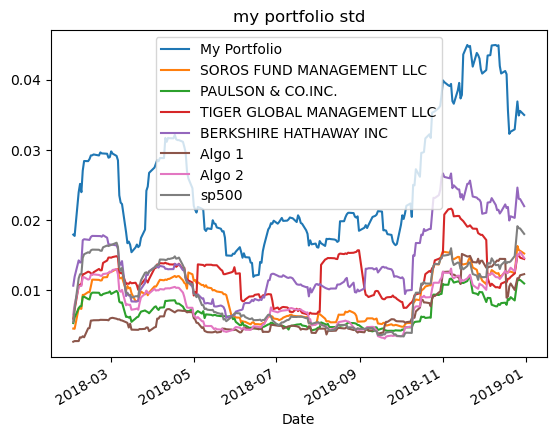

In [59]:
# Calculate rolling standard deviation
combined_rolling_std = portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation

combined_rolling_std.plot(title = 'my portfolio std')


### Calculate and plot the correlation

<Axes: title={'center': 'Correlation of Combined Portfolios'}>

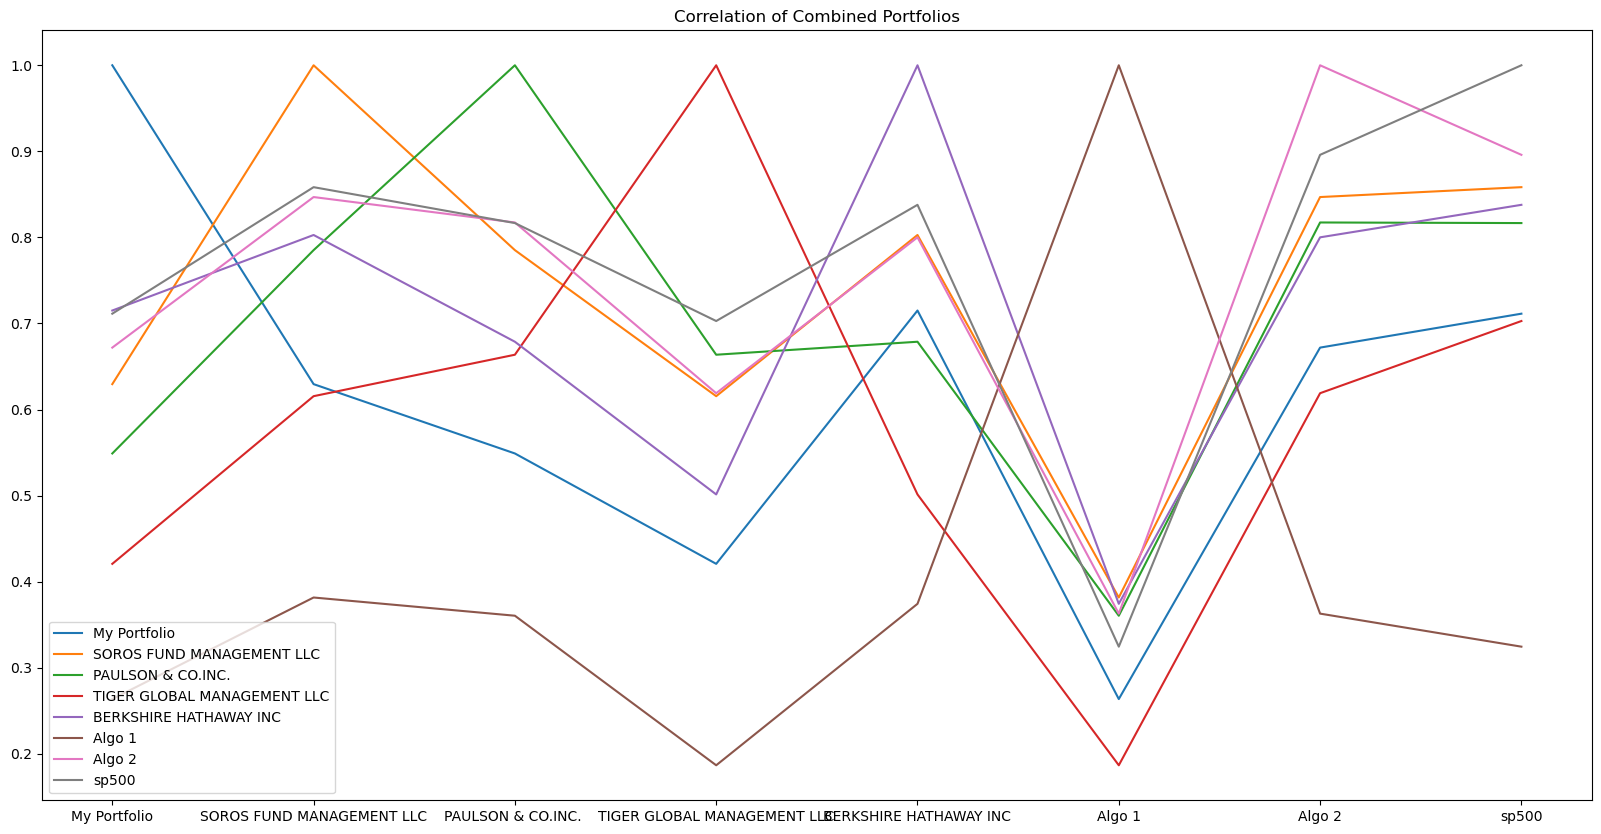

In [67]:
# Calculate and plot the correlation
correlation = portfolio_returns.corr()
correlation.plot(figsize=(20,10), title="Correlation of Combined Portfolios")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60 Day Beta'}, xlabel='Date'>

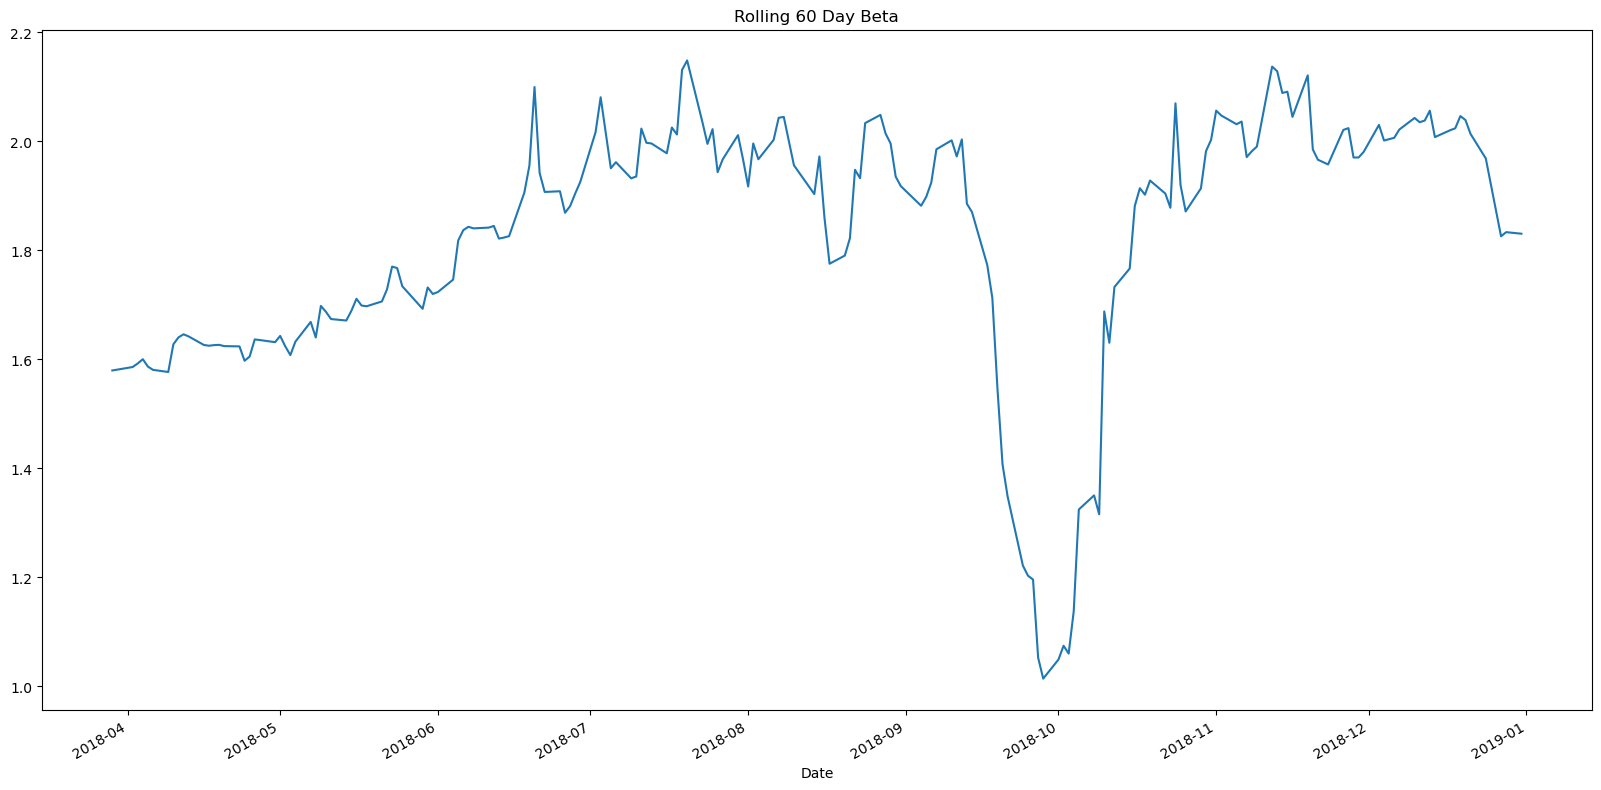

In [75]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['My Portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 60 Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized Sharpe Ratios
combined_sharpe_ratio = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

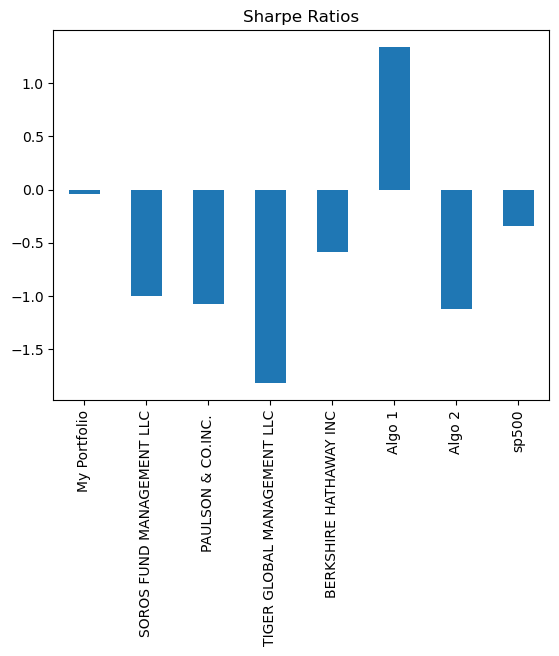

In [73]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot(kind = 'bar', title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
My Portfolio performed better than all portfolios except algo 1